In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [6]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [7]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [8]:
dfc = df.copy().drop_duplicates()

In [9]:
dfc.shape

(9994, 11)

In [10]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [11]:
dfc.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [12]:
dfc.nunique()

Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date       1236
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
dtype: int64

In [13]:
dfc.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [15]:
print(dfc[dfc['Sales'] == -80995.000000])

Empty DataFrame
Columns: [Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State]
Index: []


In [16]:
print(dfc[dfc['Sales'] < 0])

Empty DataFrame
Columns: [Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State]
Index: []


In [17]:
print(dfc[dfc['Sales'] < 0 & dfc['Profit'].astype(str).str.contains('C')])

Empty DataFrame
Columns: [Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State]
Index: []


In [19]:
print(dfc[dfc['Profit'] < 0])

Empty DataFrame
Columns: [Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State]
Index: []


In [20]:
print(dfc[dfc['City'].astype(str).str.contains('A')])

Empty DataFrame
Columns: [Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State]
Index: []


In [23]:
dfc.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

#### Check for outliners

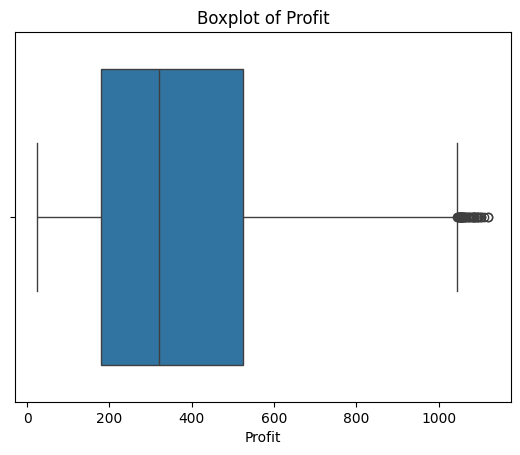

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=dfc['Profit'])
plt.title('Boxplot of Profit')
plt.show()

#### There are few outliner but it's ok to have them as the price can vary product to product.

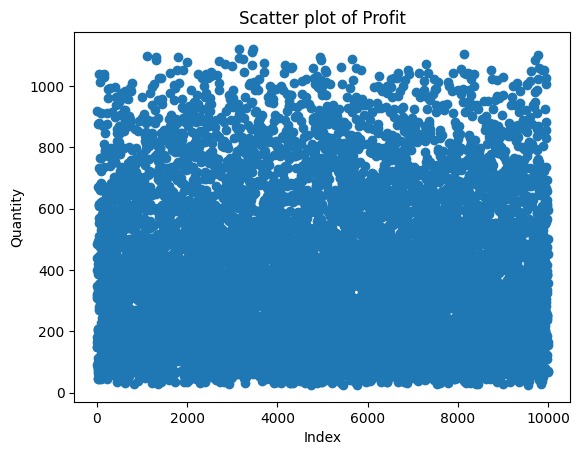

In [24]:
plt.scatter(dfc.index, dfc['Profit'])
plt.title('Scatter plot of Profit')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.show()

#### We will drop duplicates if any and save it for analysis

In [25]:
dfc= dfc.copy().drop_duplicates()

In [26]:
can_data = dfc[dfc['Category'].str.contains('C', na=False)].copy()
can_data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
